## Importar Slicer

In [64]:
import JupyterNotebooksLib as slicernb
import slicer
from ipywidgets import interact

# Set viewer size to 50% of screen size
slicernb.AppWindow.setWindowSize(scale=0.5)
# Hide patient information from slice view
slicernb.showSliceViewAnnotations(False)

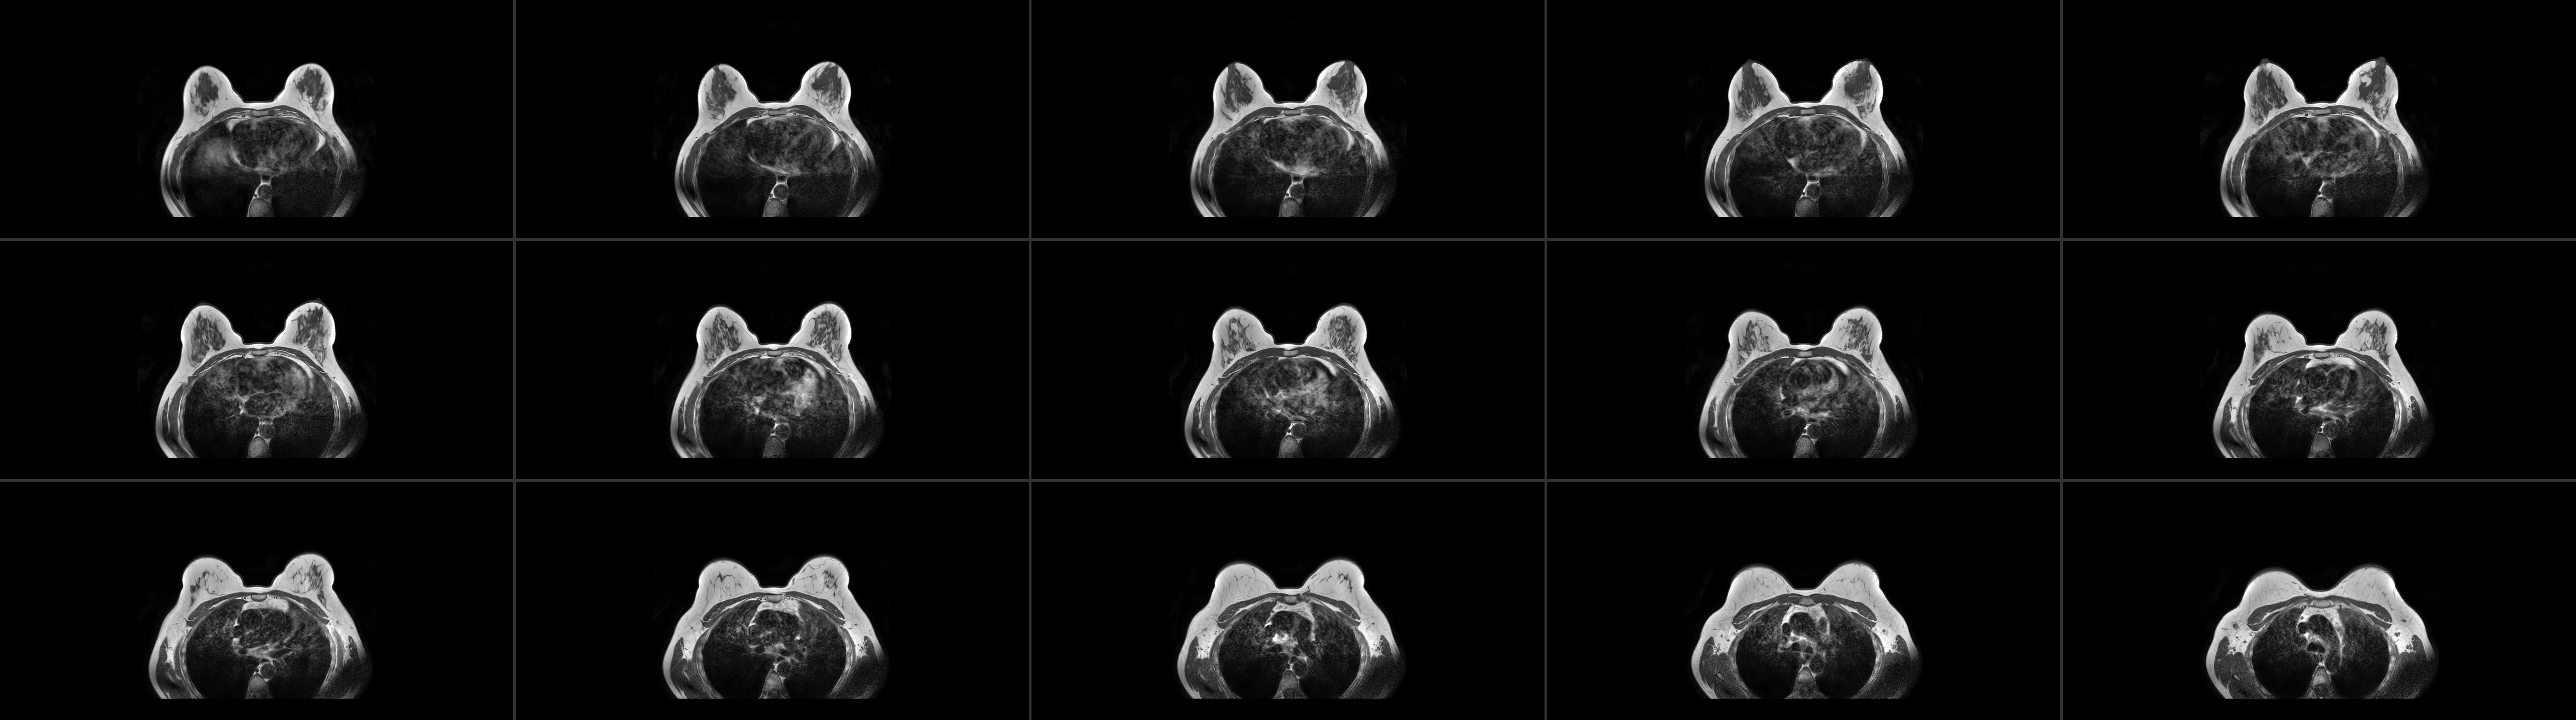

In [76]:
# Clear scene
slicer.mrmlScene.Clear(False)

# Load from local file
volume = slicer.util.loadVolume('T1W/BCCT054-T1W-0001.dcm')

# Lightbox view
slicernb.ViewLightboxDisplay("Red", columns=5, rows=3, rangeShrink=[45,50])


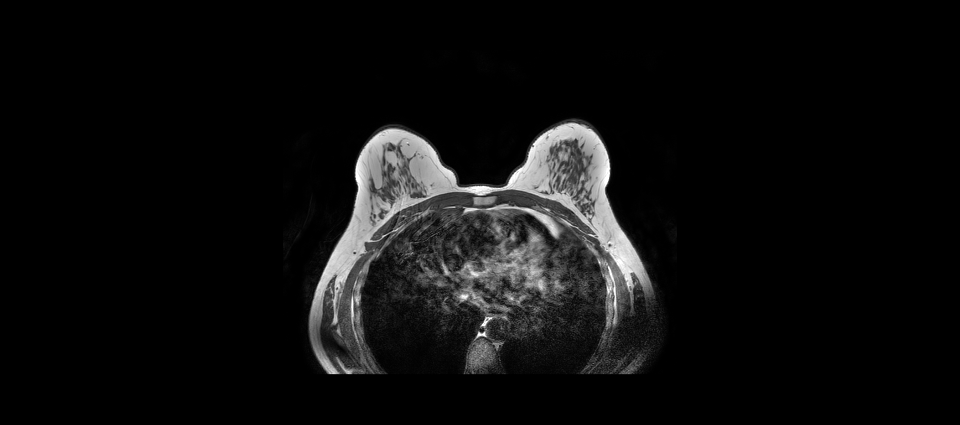

In [66]:
# Show slice view
slicernb.ViewDisplay("OneUpRedSlice")

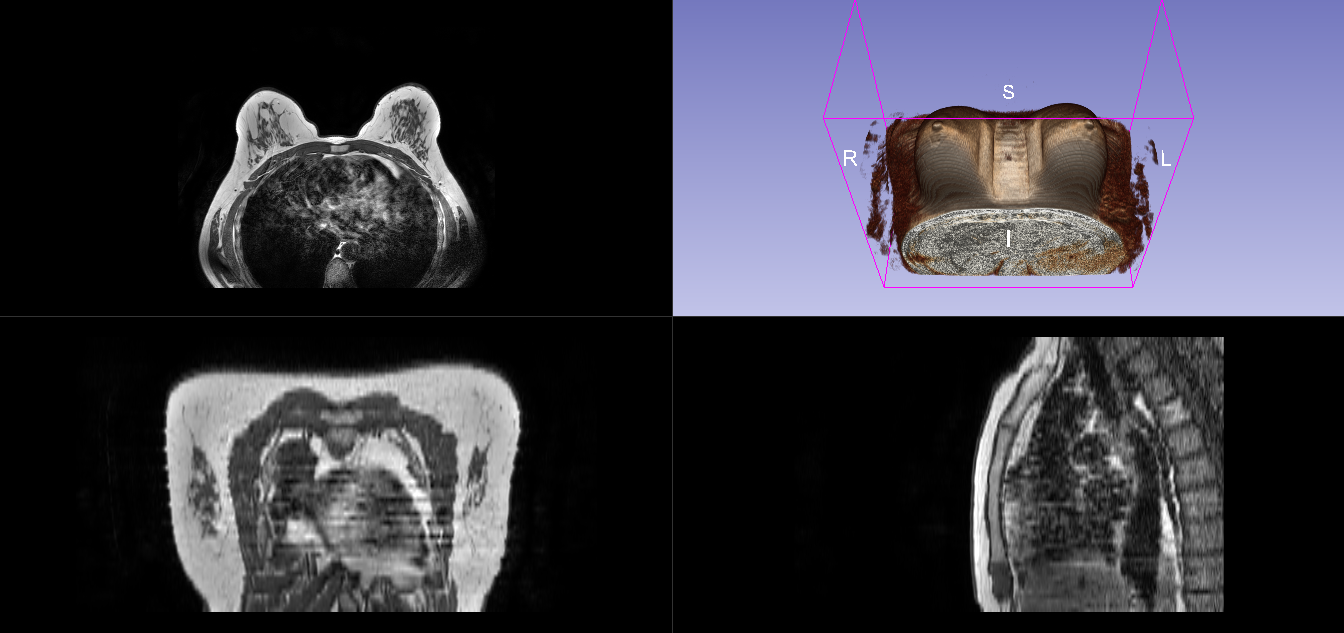

In [67]:
# Enable 3D volume rendering
slicernb.showVolumeRendering(volume)

# Show slice and 3D views
slicernb.AppWindow.setWindowSize(scale=0.7)  # Use a bit larger size, as we'll display 4 views
slicernb.ViewDisplay("FourUp")  # You can also try: FourUp, OneUpRedSlice, OneUp3D

In [75]:
# Slice view display
@interact(position=(0,100))
def update(position=60):
    return slicernb.ViewSliceDisplay('Red', positionPercent=position)

interactive(children=(IntSlider(value=60, description='position'), Output()), _dom_classes=('widget-interact',…

In [69]:
# Enable volume cropping
displayNode = slicer.modules.volumerendering.logic().GetFirstVolumeRenderingDisplayNode(volume)
displayNode.SetCroppingEnabled(True)
slicer.modules.volumerendering.logic().CreateROINode(displayNode)
roiNode = displayNode.GetROINode()

# 3D view display
slicernb.reset3DView()
roiNode.GetDisplayNode().SetVisibility(False)  # hide the ROI box
@interact(roll=(-90.0,90.0,5), pitch=(-90.0,90.0,5), yaw=(-180.0,180.0,5), cropx=(0,340,5), cropy=(0,280,5), cropz=(0,180,5))
def update(roll=0, pitch=-10, yaw=0, cropx=340, cropy=250, cropz=180):
    #roiNode.SetRadiusXYZ([cropx, cropy, cropz])
    roiNode.SetSizeWorld([cropx, cropy, cropz])
    return slicernb.View3DDisplay(0, orientation=[roll, pitch, yaw])

interactive(children=(FloatSlider(value=0.0, description='roll', max=90.0, min=-90.0, step=5.0), FloatSlider(v…

In [ ]:
# Adjust maximum rate of Slicer's Jupyter kernel consuming Jupyter messages.
# Lower values make the notebook more responsive but too low values may make the Slicer application
# slow to respond.
slicer.modules.jupyterkernel.setPollIntervalSec(0.001)

# 3D view
slicernb.AppWindow.setWindowSize(scale=0.8)
live3d = slicernb.ViewInteractiveWidget('1')
live3d.trackMouseMove = True
display(live3d)

In [71]:
# Slice view (use arrow keys to move between slices, right-click-and-drag to zoom in/out)
liveRedSlice = slicernb.ViewInteractiveWidget('R')
liveRedSlice.trackMouseMove = True
display(liveRedSlice)

ViewInteractiveWidget(height=353, width=768)

In [72]:
slicernb.showVolumeRendering(volume, show=True)
app = slicernb.AppWindow()
app
# Note: "404 : Not Found" error will be displayed if Jupyter desktop server is not configured.

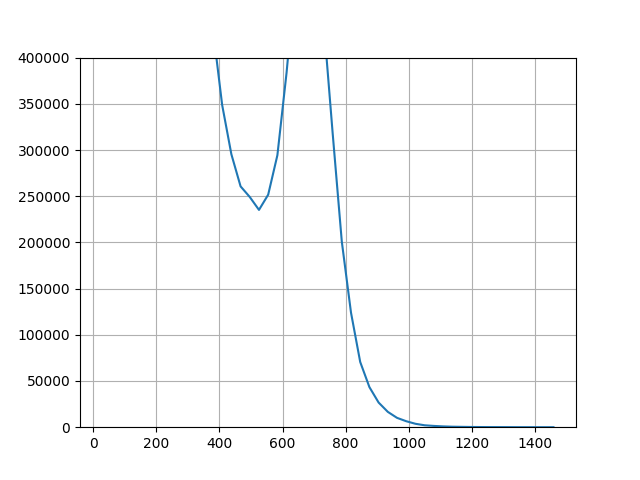

In [73]:
try:
  import matplotlib
except ModuleNotFoundError:
  slicer.util.pip_install('matplotlib')
  import matplotlib

matplotlib.use('Agg')

# Get a volume from SampleData and compute its histogram
import numpy as np
histogram = np.histogram(slicer.util.arrayFromVolume(volume), bins=50)

# Show a plot using matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(histogram[1][1:], histogram[0].astype(float))
ax.grid(True)
ax.set_ylim((0, 4e5))

slicernb.MatplotlibDisplay(plt)